In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

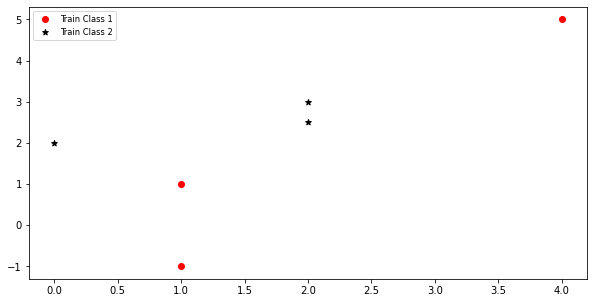

In [2]:
#read the file
traindata = pd.read_csv('D:/All Videos and Lectures of 4.2/Pattern Lab/train-perceptron.txt', sep=" ",header=None)
traindata=traindata.to_numpy()
#if the class value is 1 then store it in class 1 else class 2
class1=[[x[0],x[1]] for x in traindata if x[2]==1]
class2=[[x[0],x[1]] for x in traindata if x[2]==2]
class1 = np.array(class1)
class2 = np.array(class2)
#plot the training data
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(10)
ax.scatter(class1[:,0],class1[:,1],marker='o',color='r',label='Train Class 1')
ax.scatter(class2[:,0],class2[:,1],marker='*',color='k',label='Train Class 2')
legend = ax.legend(loc='upper left', shadow=False, fontsize='small',labelspacing=0.5)
legend.get_frame().set_facecolor('None')
plt.show()

In [3]:
#higher dimension
polynomial_array = np.zeros(shape=(len(traindata),6))
for i in range(len(class1)):
    polynomial_array[i][0]=np.power(class1[i][0],2)
    polynomial_array[i][1]=np.power(class1[i][1],2)
    polynomial_array[i][2]=class1[i][0]*class1[i][1]
    polynomial_array[i][3]=class1[i][0]
    polynomial_array[i][4]=class1[i][1]
    polynomial_array[i][5]=1
for i in range(len(class2)):
    polynomial_array[len(class1)+i][0]=-(np.power(class2[i][0],2))
    polynomial_array[len(class1)+i][1]=-(np.power(class2[i][1],2))
    polynomial_array[len(class1)+i][2]=-(class2[i][0]*class2[i][1])
    polynomial_array[len(class1)+i][3]=-class2[i][0]
    polynomial_array[len(class1)+i][4]=-class2[i][1]
    polynomial_array[len(class1)+i][5]=-1

In [4]:
weight = [[0]*6 for i in range(3)]

weight[0]=np.ones(6)
weight[1]=np.zeros(6)
np.random.seed(25)
weight[2]=np.random.random(6)
weight=np.array(weight)

[[  0.1   6.  102. ]
 [  0.2  92.  104. ]
 [  0.3 104.   91. ]
 [  0.4 106.  116. ]
 [  0.5  93.  105. ]
 [  0.6  93.  114. ]
 [  0.7 108.   91. ]
 [  0.8 115.   91. ]
 [  0.9  94.  105. ]
 [  1.   94.   93. ]]


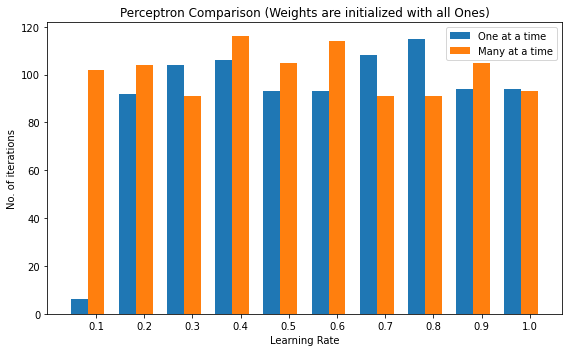

[[  0.1  94.  105. ]
 [  0.2  94.  105. ]
 [  0.3  94.  105. ]
 [  0.4  94.  105. ]
 [  0.5  94.   92. ]
 [  0.6  94.  105. ]
 [  0.7  94.   92. ]
 [  0.8  94.  105. ]
 [  0.9  94.  105. ]
 [  1.   94.   92. ]]


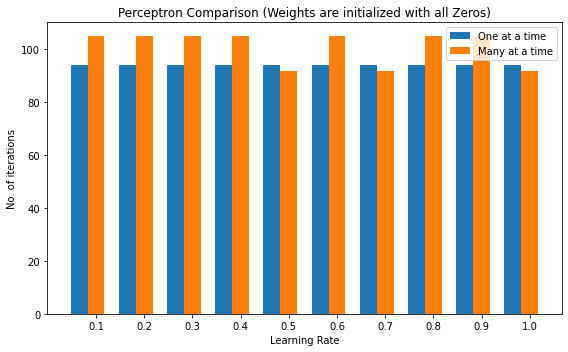

[[  0.1 100.   93. ]
 [  0.2 100.  108. ]
 [  0.3 110.  116. ]
 [  0.4  96.  122. ]
 [  0.5  94.  106. ]
 [  0.6 106.  120. ]
 [  0.7 115.  106. ]
 [  0.8 105.   88. ]
 [  0.9 110.  101. ]
 [  1.  109.  101. ]]


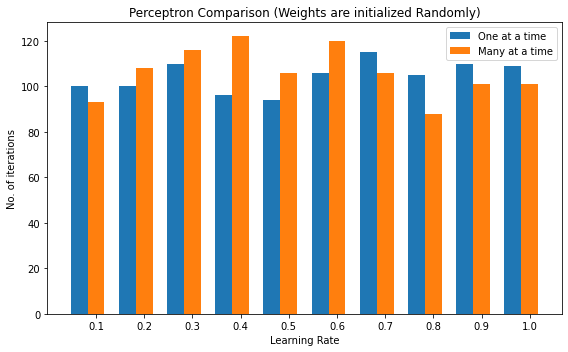

In [5]:
for l in range(3):
    counter=0
    table = np.zeros(shape=(10,3))
    for alpha in np.arange(1,11,1)/10:
        table[counter][0]=alpha
        w = weight[l]
        iteration=0
        for j in range(300):
            check=0
            for i in range(len(traindata)):
                g=np.dot(polynomial_array[i,:],w.T)
                if g<=0:
                    w=w+alpha*polynomial_array[i,:]
                else:
                    check=check+1
            if(check==len(traindata)):
                iteration=j+1
                break
        table[counter][1]=iteration
        
        w = weight[l]
        iteration=0
        wtemp=0
        for j in range(300):
            check=0
            wtemp=0
            for i in range(len(traindata)):
                g=np.dot(polynomial_array[i,:],w.T)
                if g<=0:
                    wtemp=wtemp+polynomial_array[i,:]
                else:
                    check=check+1
            if(check==len(traindata)):
                iteration=j+1
                break
            w=w+alpha*wtemp
        table[counter][2]=iteration
        counter=counter+1
    
    print(np.array_str(table, suppress_small=True))

    fig, ax = plt.subplots()
    fig.set_figheight(5)
    fig.set_figwidth(8)
    index = np.arange(10)
    bar_width = 0.35
    
    if l==0:
        plt.title('Perceptron Comparison (Weights are initialized with all Ones)')
    elif l==1:
        plt.title('Perceptron Comparison (Weights are initialized with all Zeros)')
    else:
        plt.title('Perceptron Comparison (Weights are initialized Randomly)')
    
    plt.bar(index, table[:,1], bar_width,label='One at a time')
    plt.bar(index + bar_width, table[:,2], bar_width, label='Many at a time')
    plt.xlabel('Learning Rate')
    plt.ylabel('No. of iterations')
    plt.xticks(index + bar_width, table[:,0])
    plt.legend()
    plt.tight_layout()
    plt.show()